# Amr Hacoglu - #GRIPAUGUST2024

# 📝 #5 Exploratory Data Analysis: Indian Premier League

## 📋 Overview

This notebook performs Exploratory Data Analysis (EDA) on the Indian Premier League (IPL) dataset. The goal is to analyze match and delivery data to find insights into team and player performances, as well as factors contributing to wins or losses. The following steps will be covered:

1. Importing Libraries
2. Loading and Displaying the Dataset
3. Analyzing Matches Data
4. Analyzing Deliveries Data
5. Visualizing Key Insights

Let's get started! 🚀

# Importing Libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Loading the Datasets

In [151]:
matches = pd.read_csv('/kaggle/input/task5datasets/matches.csv')
deliveries = pd.read_csv('/kaggle/input/task5datasets/deliveries.csv')

# Displaying the First Few Rows of Each Dataset

In [152]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [153]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Displaying Basic Statistics and Information About the Matches Dataset

In [154]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [155]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Checking for Missing Values

In [156]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Filling Missing Values

In [157]:
matches['city'] = matches['city'].fillna('Unknown')
matches['winner'] = matches['winner'].fillna('Unknown')
matches['player_of_match'] = matches['player_of_match'].fillna('Unknown')
matches['umpire1'] = matches['umpire1'].fillna('Unknown')
matches['umpire2'] = matches['umpire2'].fillna('Unknown')
matches['umpire3'] = matches['umpire3'].fillna('Unknown')

In [158]:
matches = matches.drop_duplicates()

# Analyzing Matches Data

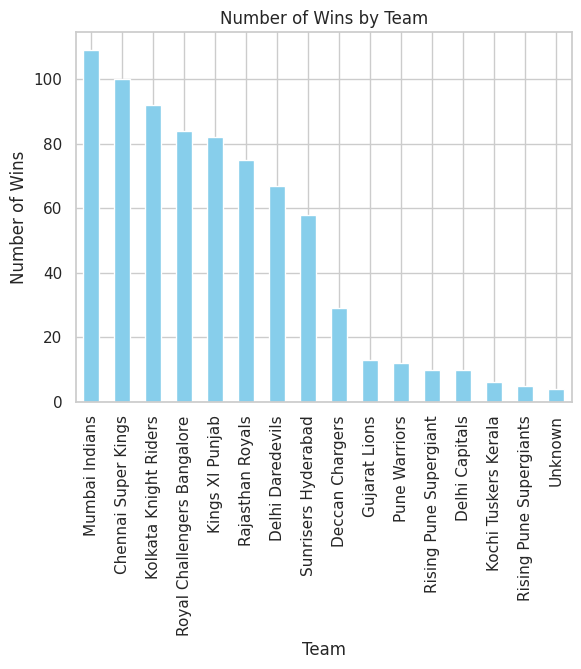

In [159]:
# Most Successful Teams
team_wins = matches['winner'].value_counts()
team_wins.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

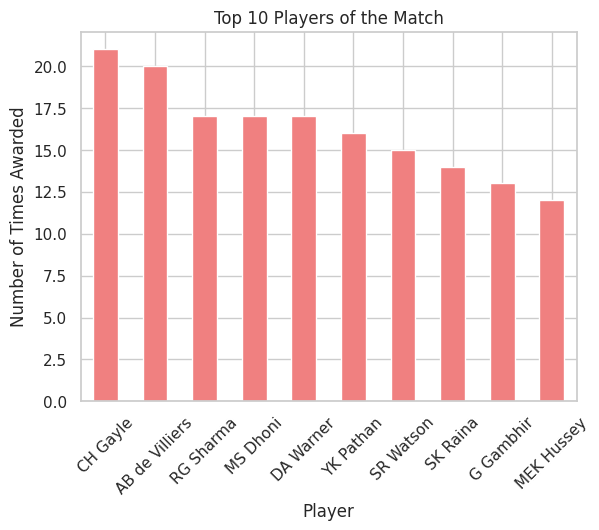

In [160]:
# Player of the Match Most Frequently
player_of_match = matches['player_of_match'].value_counts()
player_of_match.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Times Awarded')
plt.xticks(rotation=45)
plt.show()

# Displaying Basic Statistics and Information About the Deliveries Dataset

In [161]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [162]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Checking for Missing Values

In [163]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

## Filling Missing Values

In [164]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('Unknown')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('Unknown')
deliveries['fielder'] = deliveries['fielder'].fillna('Unknown')

In [165]:
deliveries = deliveries.drop_duplicates()

# Analyzing Deliveries Data

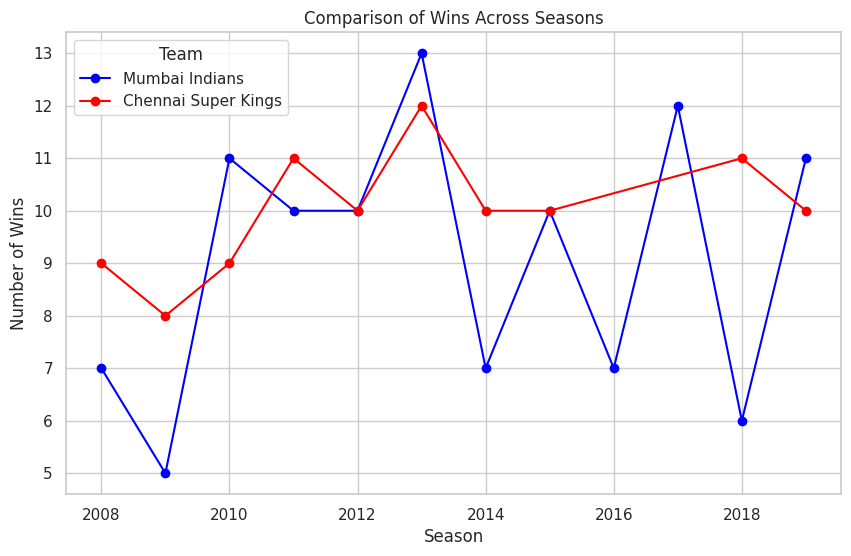

In [166]:
# Comparison of Wins Across Seasons Between Top Two Teams
team1 = 'Mumbai Indians'
team2 = 'Chennai Super Kings'
team1_wins = matches[matches['winner'] == team1].groupby('season').size()
team2_wins = matches[matches['winner'] == team2].groupby('season').size()

plt.figure(figsize=(10, 6))
plt.plot(team1_wins.index, team1_wins.values, marker='o', label=team1, color='blue')
plt.plot(team2_wins.index, team2_wins.values, marker='o', label=team2, color='red')
plt.title('Comparison of Wins Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team')
plt.grid(True)
plt.show()


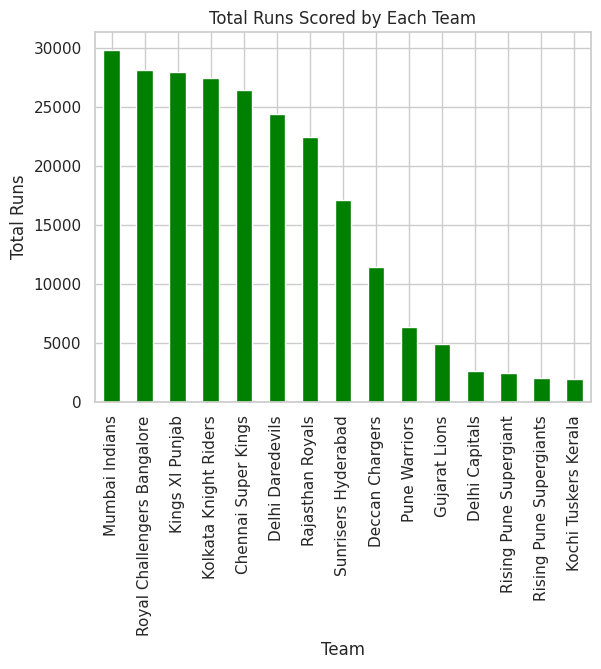

In [167]:
# Total Runs Scored by Each Team
total_runs = deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
total_runs.plot(kind='bar', color='green')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

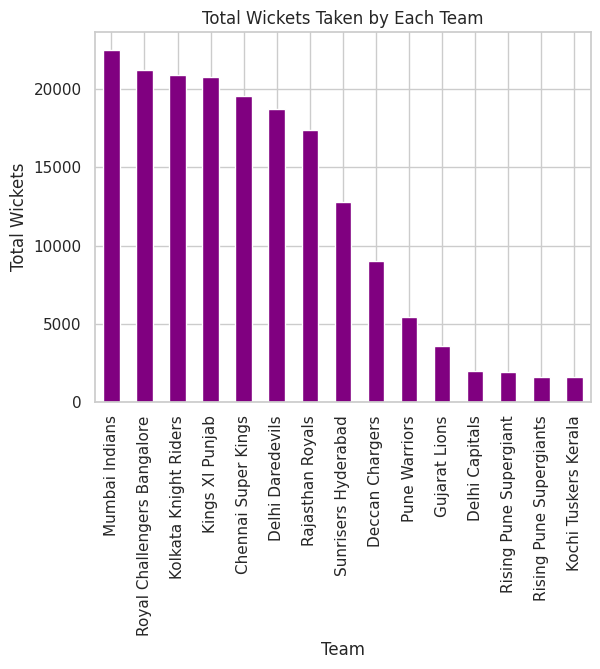

In [168]:
# Total Wickets Taken by Each Team
total_wickets = deliveries[deliveries['player_dismissed'].notnull()].groupby('bowling_team')['player_dismissed'].count().sort_values(ascending=False)
total_wickets.plot(kind='bar', color='purple')
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.xticks(rotation=90)
plt.show()

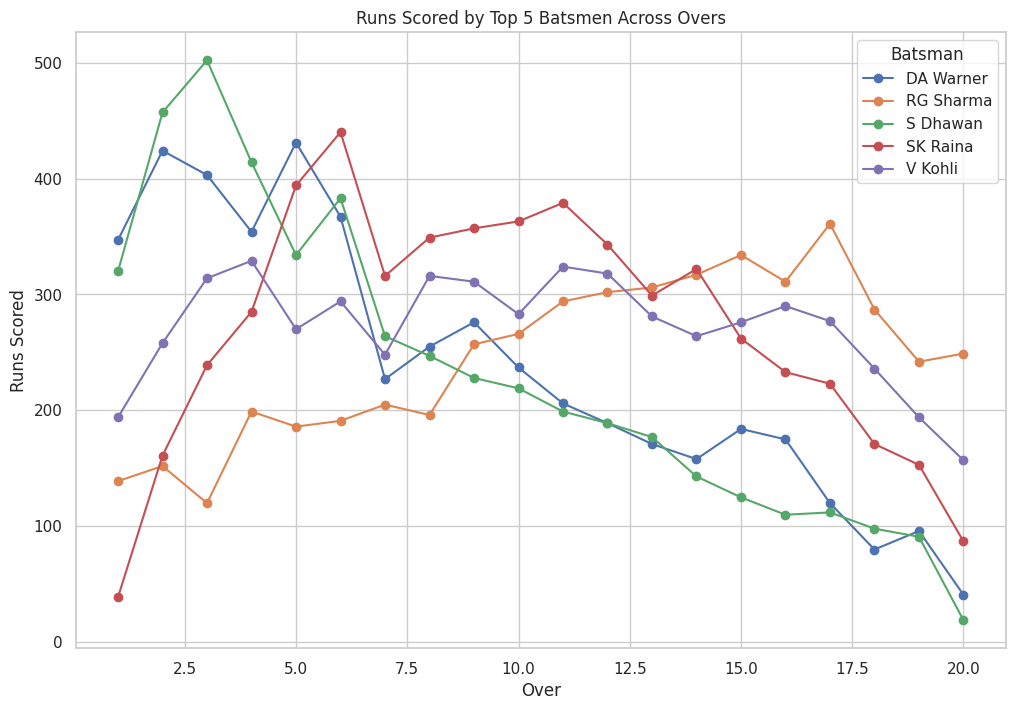

In [169]:
# Line Plot of Runs Scored by Top Batsmen Across Overs

# Selecting the top 5 batsmen based on total runs scored
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().nlargest(5).index
runs_by_top_batsmen = deliveries[deliveries['batsman'].isin(top_batsmen)]

# Creating a pivot table for top batsmen
runs_by_top_batsmen_pivot = runs_by_top_batsmen.pivot_table(index='over', columns='batsman', values='batsman_runs', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,8))
for batsman in runs_by_top_batsmen_pivot.columns:
    plt.plot(runs_by_top_batsmen_pivot.index, runs_by_top_batsmen_pivot[batsman], marker='o', label=batsman)

plt.title('Runs Scored by Top 5 Batsmen Across Overs')
plt.xlabel('Over')
plt.ylabel('Runs Scored')
plt.legend(title='Batsman')
plt.grid(True)
plt.show()

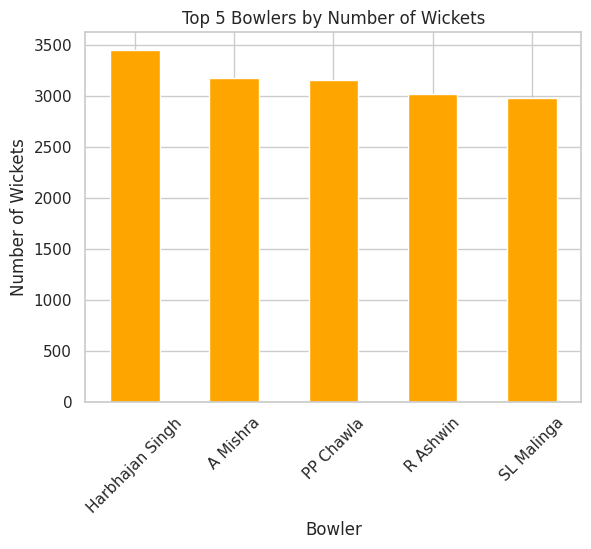

In [170]:
# Performance of Top 5 Bowlers Based on Wickets
top_bowlers = deliveries[deliveries['player_dismissed'].notnull()].groupby('bowler')['player_dismissed'].count().nlargest(5)
top_bowlers.plot(kind='bar', color='orange')
plt.title('Top 5 Bowlers by Number of Wickets')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.show()
